In [1]:
# Import pacmap before numpy

import pacmap
import numpy as np
import pandas as pd

from pathlib import Path

/home/acheung/birdclef-2024/venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


In [2]:
embeddings_dir = Path("data/encodec_embeddings")

species_list = ["bawman1", "equaka1", "joygre1"]

In [3]:
species_embeddings = {
    species: np.array(
        pd.read_parquet(embeddings_dir / f"{species}.parquet")[
            "embedding"
        ].values.tolist()
    )
    for species in species_list
}

In [4]:
species_embeddings["bawman1"]

array([[121, 835, 228, ...,   8, 442, 885],
       [237, 731, 237, ..., 625, 528, 625],
       [497, 792, 237, ..., 814, 253, 727],
       ...,
       [408, 835, 835, ..., 239, 673, 762],
       [835, 835, 339, ..., 741, 673, 673],
       [835, 798, 395, ..., 673, 673, 673]])

In [9]:
X = np.concatenate([species_embeddings[species] for species in species_list])
y = np.concatenate(
    [[i] * len(species_embeddings[species]) for i, species in enumerate(species_list)]
)
print(X.shape)
print(y.shape)

(495, 300)
(495,)


## PaCMAP

In [64]:
from matplotlib import pyplot as plt


def plot(X_transformed, y):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y)
    ax.legend(handles=scatter.legend_elements()[0], labels=species_list)
    plt.show()


def reduce_pacmap(
    X, n_components=None, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0, init="pca"
):
    if not n_components:
        n_components = len(species_list)
    model = pacmap.PaCMAP(
        n_components=n_components,
        n_neighbors=n_neighbors,
        MN_ratio=MN_ratio,
        FP_ratio=FP_ratio,
    )
    X_transformed = model.fit_transform(X, init=init)
    return X_transformed

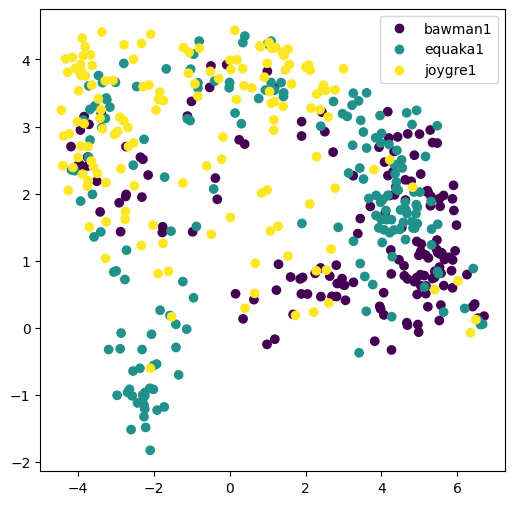

In [65]:
plot(reduce_pacmap(X), y)

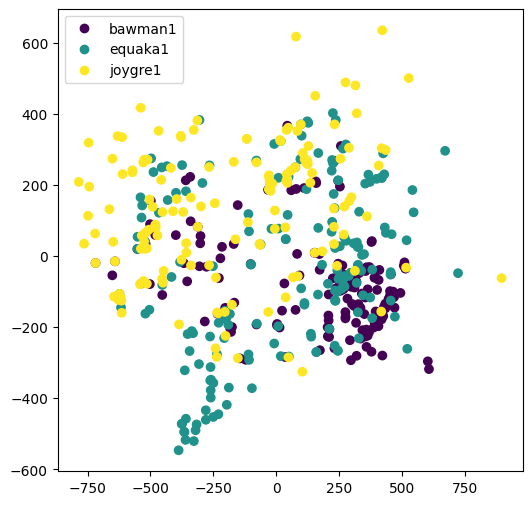

In [66]:
from scipy.fftpack import dct

X_dct = dct(X, axis=1)
plot(reduce_pacmap(X_dct), y)

## UMAP

In [75]:
import umap


def reduce_umap(X, n_neighbors, n_dims=2, min_dist=0.1, metric="cosine"):
    reducer = umap.UMAP(
        n_components=n_dims, n_neighbors=n_neighbors, min_dist=min_dist, metric=metric
    )
    X_transformed = reducer.fit_transform(X)
    return X_transformed

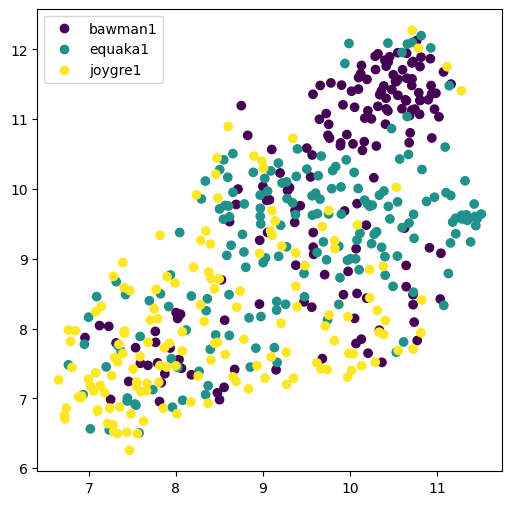

In [76]:
plot(reduce_umap(X, 10), y)

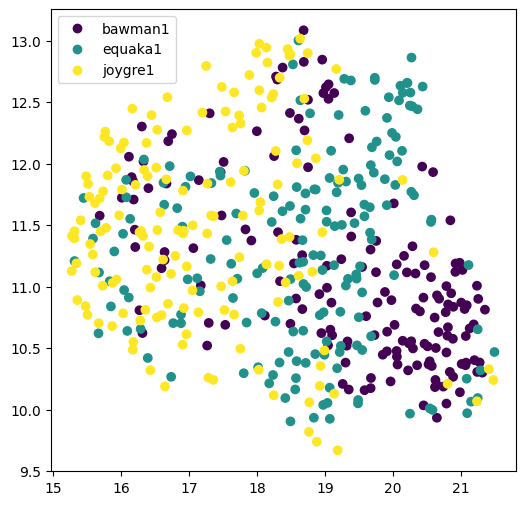

In [77]:
plot(reduce_umap(X, 20), y)

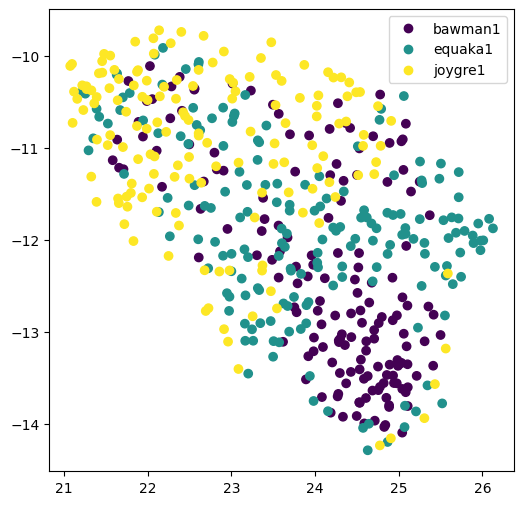

In [78]:
plot(reduce_umap(X, 50), y)

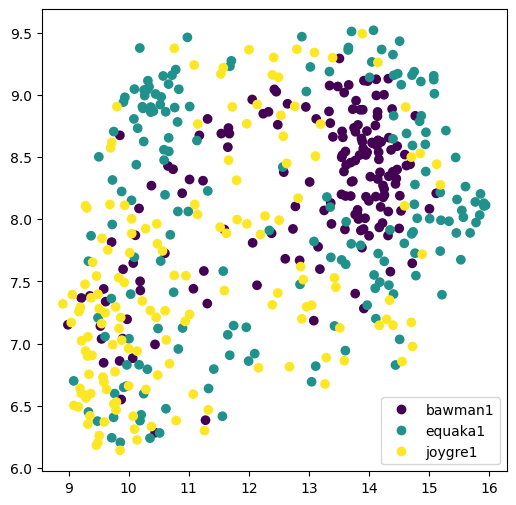

In [82]:
plot(reduce_umap(X, 20, metric="euclidean"), y)

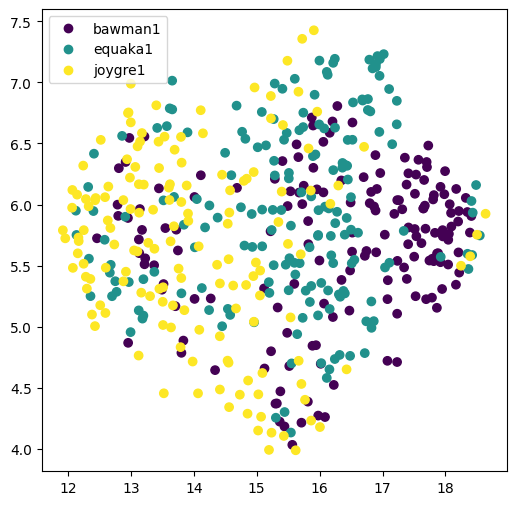

In [83]:
plot(reduce_umap(X_dct, 20), y)